In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [39]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [40]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [41]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils import plot_model
from glob import glob


In [42]:
# visualization
from cv2 import cvtColor
import glob # Import the glob module

x_data = []
y_data = []
for category in glob.glob(train_path+'/*'): # Call glob.glob()
    for file in tqdm(glob.glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:05<00:00, 2131.41it/s]


In [43]:
data.shape

(22564, 2)

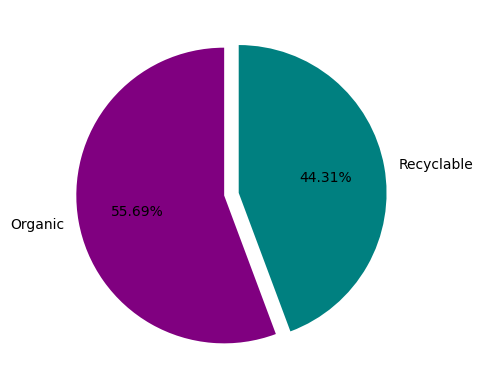

In [44]:
colors = ['#800080', '#008080']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle= 90, explode=[0.05, 0.05])
plt.show()

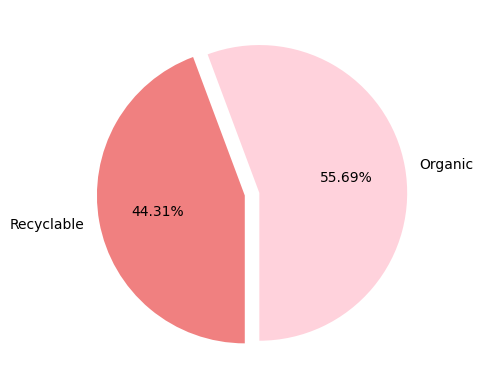

In [45]:
colors = ['#FFD2DC', '#F08080']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle= 270, explode=[0.05, 0.05])
plt.show()

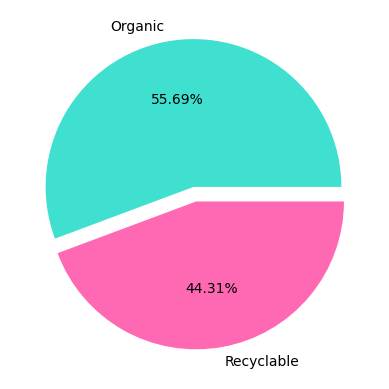

In [46]:
colors = ['#40E0D0', '#FF69B4']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle= 360, explode=[0.05, 0.05])
plt.show()

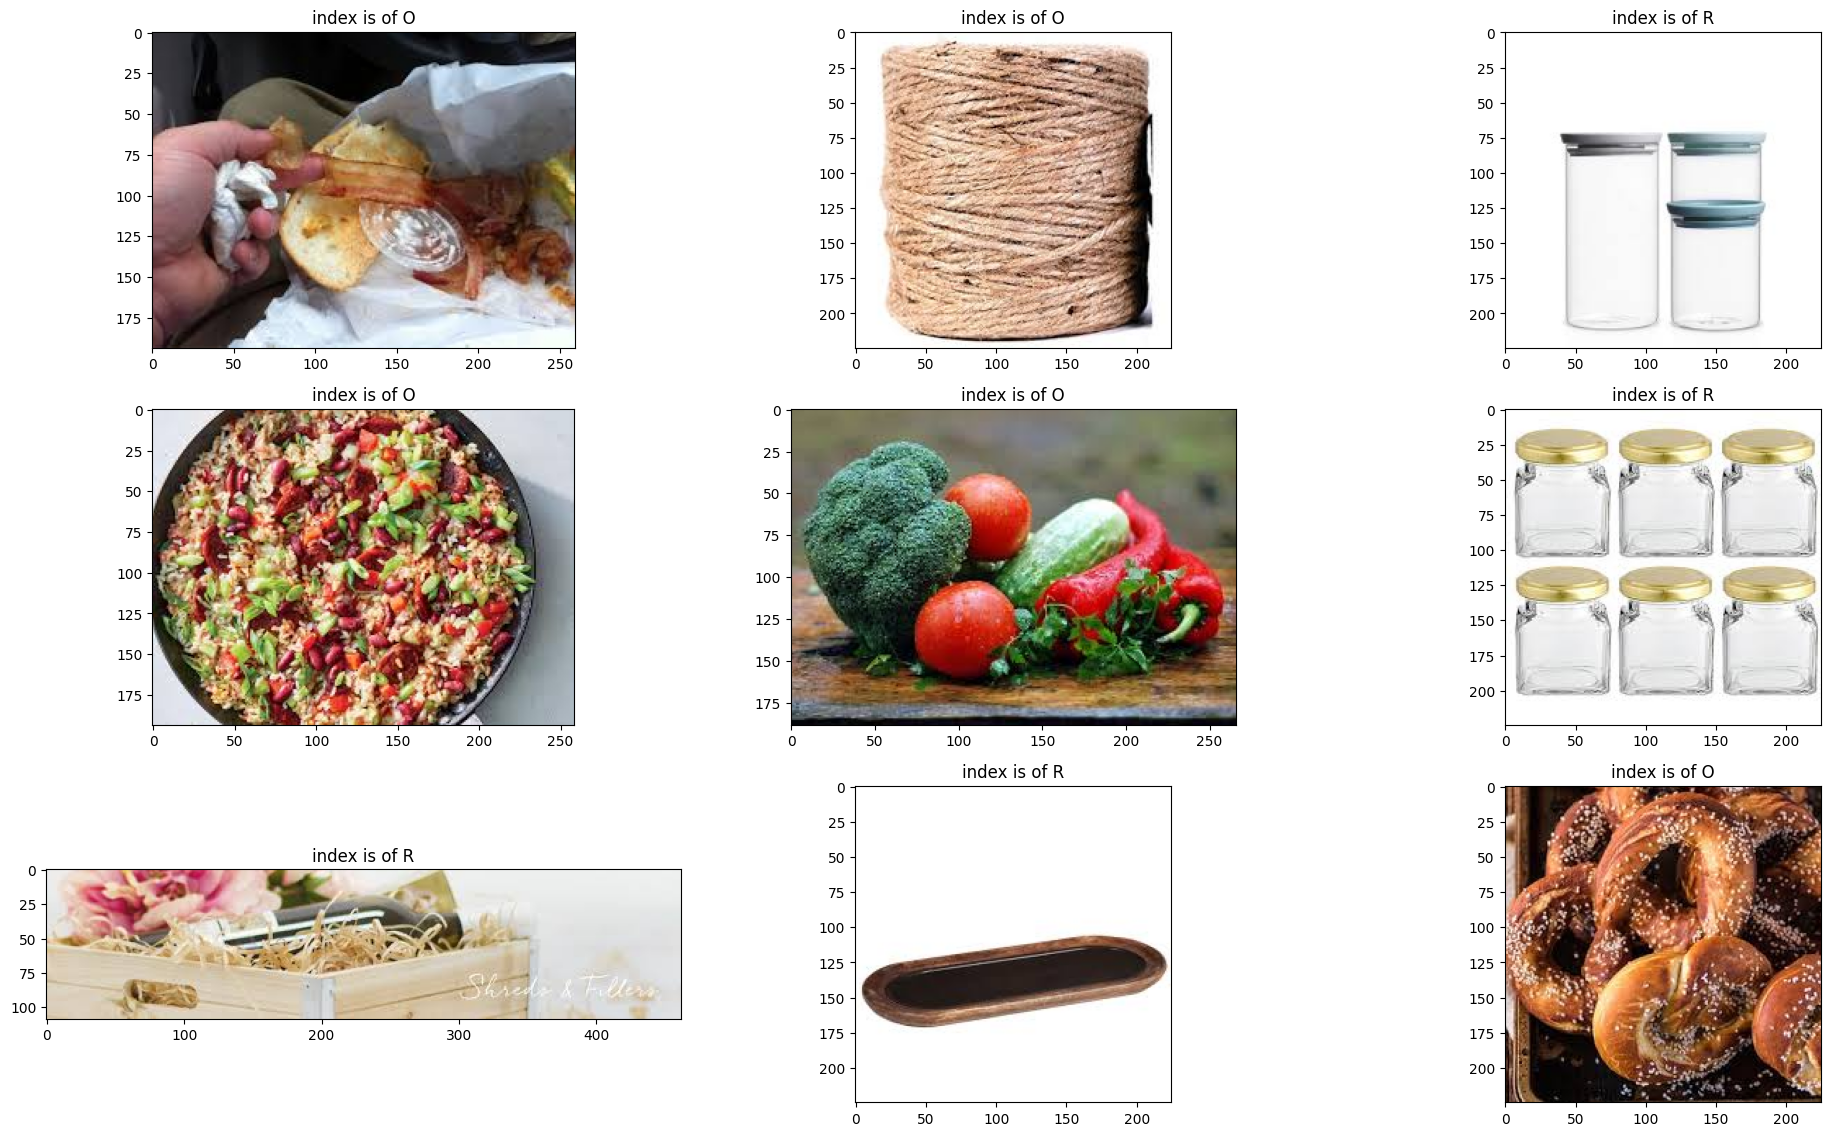

In [47]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('index is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [48]:
# Define the CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(32, (3, 3),
input_shape=(224, 224, 3)))  # Input shape for 224x224 RGB images
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Flatten the features for the dense layers
model.add(Flatten())

# Fully connected dense layers with dropout
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2))  # Assuming two output classes
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 64


In [49]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Define image data generators
train_datagen = ImageDataGenerator(rescale= 1./225)


In [51]:
# Define image data generators
test_datagen = ImageDataGenerator(rescale= 1./225)

In [52]:
# Define dataset paths
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [53]:
hist = model.fit(
     train_generator,
     epochs = 15,
     validation_data = test_generator
     )

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.7691 - loss: 0.5114 - val_accuracy: 0.8150 - val_loss: 0.4014
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.8476 - loss: 0.3787 - val_accuracy: 0.8830 - val_loss: 0.2966
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 49s 138ms/step - accuracy: 0.8618 - loss: 0.3480 - val_accuracy: 0.8993 - val_loss: 0.2723
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 49s 139ms/step - accuracy: 0.8788 - loss: 0.3140 - val_accuracy: 0.9057 - val_loss: 0.2796
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.8986 - loss: 0.2702 - val_accuracy: 0.8770 - val_loss: 0.3311
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 144ms/step - accuracy: 0.9106 - loss: 0.2386 - val_accuracy: 0.8902 - val_loss: 0.3442
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.9351 - loss: 0.1778 - val_accuracy: 0.9065 - val_loss: 0.3222
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 143ms/step - accuracy: 0.9507 - loss: 0

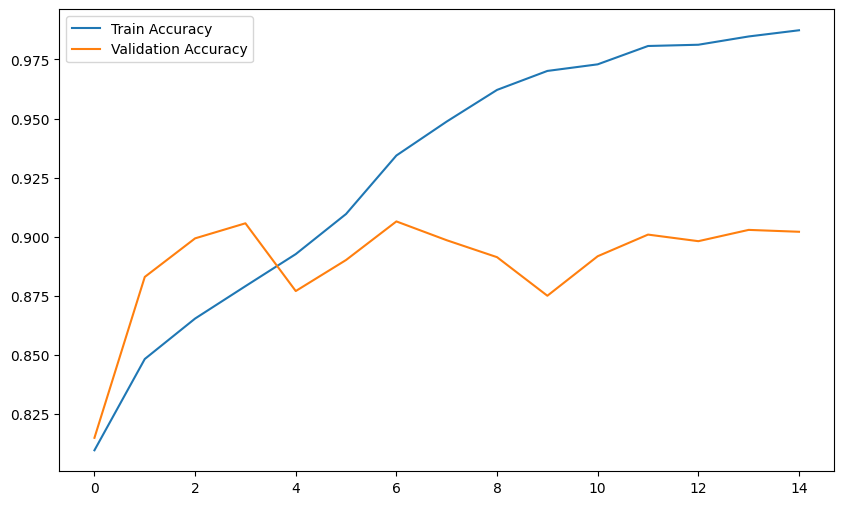

In [56]:
plt.figure(figsize=(10,6))
plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()


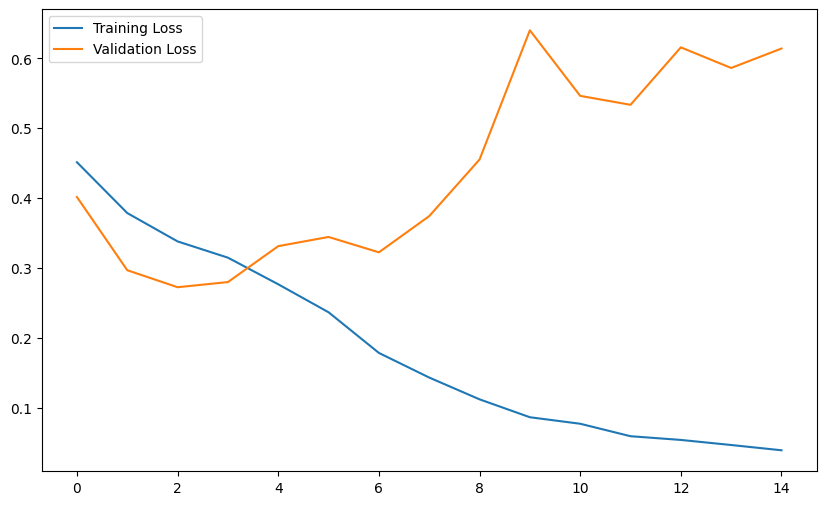

In [57]:
plt.figure(figsize=(10,6))
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [60]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    # Change 'cv2.Color' to 'cv2.cvtColor'
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img,(224,224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print("the image is Recyclable waste")
    elif result == 1:
        print("the image show is Organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
the image show is Organic waste


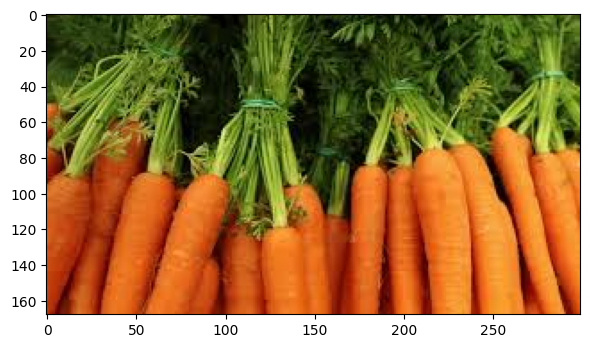

In [63]:
test_img = cv2.imread("/content/O_12678.jpg")
predict_fun(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
the image is Recyclable waste


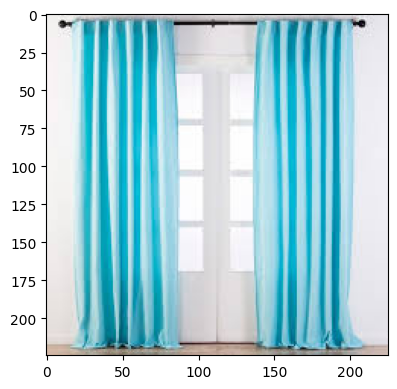

In [71]:
test_img = cv2.imread("/content/R_10091.jpg")
predict_fun(test_img)
